By Drilon & Chia-Hua

### Download Data

The data is taken from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/, but you can have it in the form of the UCI-HAR-Dataset.zip.

Extract it to the folder of your notebook with the solution (or suitably adjust the paths to training and test data specified below (TRAIN, TEST).  

Spcifically, the split into training and testing data is already done. The dataset contains 7352 training and 2947 test samples.  

Each sample consists of nine timeseries of float values, each of length 128.

The nine timeseries are collected by an accelerometer and a gyroscope that contain information about the motion and the orientation, respectively.

In [1]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load Data

In [2]:
# Useful Constants
TRAIN = "UCI_HAR_Dataset/train/"
TEST = "UCI_HAR_Dataset/test/"

# x-values, 'signals'
# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
X_train_signals_paths = [TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES]
X_test_signals_paths =  [TEST  + "Inertial Signals/" + signal + "test.txt"  for signal in INPUT_SIGNAL_TYPES]


# y-values, 'labels'
#Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]
N_CLASSES = len(LABELS)
y_train_path = TRAIN + "y_train.txt"
y_test_path  = TEST  + "y_test.txt"

In [3]:
# Load "X" (the neural network's training and testing inputs)
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)
print(X_train.shape, X_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [4]:
# Load "y" (the neural network's training and testing outputs)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

def one_hot(y, n_classes):
    y = y.reshape(len(y))
    return np.eye(n_classes)[np.array(y, dtype=np.int32)]

def label_from_onehot(vectors):
    indices = []
    for vector in vectors:
        indices.append(np.argmax(vector))
    return np.array(indices)

Y_train = load_y(y_train_path)
Y_test = load_y(y_test_path)
print(Y_train.shape, Y_test.shape)

(7352, 1) (2947, 1)


#### Plot some samples

In [5]:
X_train_per_class = {}
for c in range(N_CLASSES):
    mask = ... # select sample of given class c
    X_train_per_class[c] = X_train[mask]

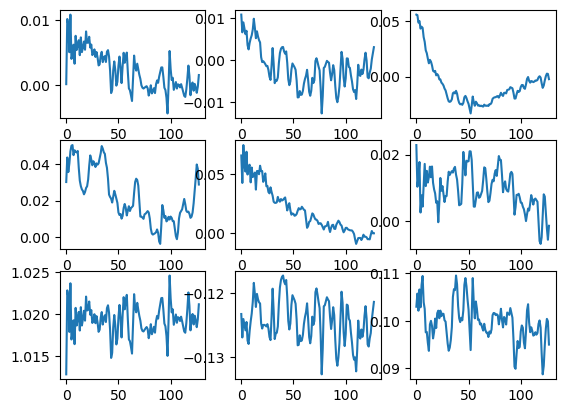

In [6]:
def plot_lines(X, nsamples):
    t = range(128)
    for i in range(9):
        plt.subplot(3,3,i+1)
        for j in range(np.minimum(X.shape[0],nsamples)):
            plt.plot(t,X[j,:,i])
    plt.show()
    
plot_lines(X_train_per_class[1], 1)

In [7]:
# Input Data
training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
means = np.mean(X_train, axis=(0,1))
stdevs = np.std(X_train, axis=(0,1))

print("X shape, Y_shape:")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)

Mean / Stdev for each feature:
-0.0006 |  0.1948
-0.0003 |  0.1224
-0.0003 |  0.1069
 0.0005 |  0.4068
-0.0008 |  0.3819
 0.0001 |  0.2557
 0.8047 |  0.4141
 0.0288 |  0.3910
 0.0865 |  0.3578


### Dataset

If suitable specify Dataset (e.g. in PyTorch).

In [26]:
Y_train_onehot = one_hot(Y_train, N_CLASSES)
Y_test_onehot = one_hot(Y_test, N_CLASSES)

### Normalization

...

## Specify and Train Models

Try different architectures to solve the activity recognition problem.

At minimum implement
* Model with a single layer of SimpleRNN
* Model with a single layer of LSTM
* Model with several layers of LSTMs
* Model with several CNN layers
* MLP

Try with different number of units. Add regularisation if needed (e.g. when working with MLPs).

Report about your findings.

### Single Layer SimpleRNN

In [21]:
from keras import Sequential, layers, optimizers

def plot_performance(model_log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(model_log.history['loss'], label='Training loss')
    ax1.plot(model_log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(model_log.history['accuracy'], label='Training acc')
    ax2.plot(model_log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

In [18]:
### START YOUR CODE

simple_RNN_model = Sequential()
simple_RNN_model.add(layers.SimpleRNN(input_shape=(128, 9), units=256))
simple_RNN_model.add(layers.Dense(N_CLASSES, activation="softmax"))
simple_RNN_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

simple_RNN_model.summary()
### END YOUR CODE

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 256)               68096     
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 69,638
Trainable params: 69,638
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
115/115 [==============================] - 29s 239ms/step - loss: 1.4288 - accuracy: 0.4150 - val_loss: 1.4516 - val_accuracy: 0.3054
Epoch 2/10
115/115 [==============================] - 18s 155ms/step - loss: 1.2734 - accuracy: 0.4656 - val_loss: 1.4145 - val_accuracy: 0.4007
Epoch 3/10
115/115 [==============================] - 19s 162ms/step - loss: 1.0251 - accuracy: 0.5698 - val_loss: 1.1419 - val_accuracy: 0.5606
Epoch 4/10
115/115 [==============================] - 23s 196ms/step - loss: 0.9687 - accuracy: 0.6075 - val_loss: 1.0163 - val_accuracy: 0.5959
Epoch 5/10
115/115 [==============================] - 22s 188ms/step - loss: 0.9877 - accuracy: 0.5828 - val_loss: 1.1135 - val_accuracy: 0.5531
Epoch 6/10
115/115 [==============================] - 18s 159ms/step - loss: 0.8524 - accuracy: 0.6417 - val_loss: 1.0166 - val_accuracy: 0.5884
Epoch 7/10
115/115 [==============================] - 19s 161ms/step - loss: 0.8524 - accuracy: 0.6450 - val_loss: 0.9610 - val_ac

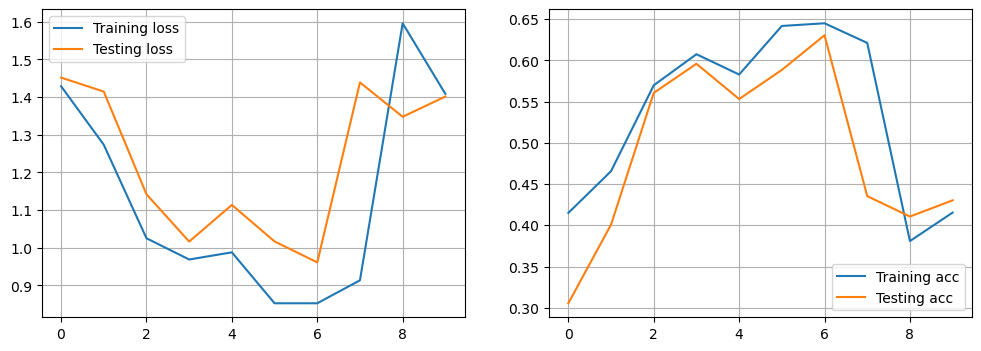

In [19]:
### START YOUR CODE
batch_size = 64
n_epochs   = 10

log = simple_RNN_model.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)

Very unstable learning like shown in class

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 256)               68096     
                                                                 
 dense_6 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 69,638
Trainable params: 69,638
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
115/115 [==============================] - 21s 171ms/step - loss: 1.1541 - accuracy: 0.5107 - val_loss: 0.9301 - val_accuracy: 0.6186
Epoch 2/10
115/115 [==============================] - 34s 293ms/step - loss: 1.0908 - accuracy: 0.5525 - val_loss: 1.5722 - val_accuracy: 0.4574
Epoch 3/10
115/115 [==============================] - 23s 198ms/step - loss: 1.0350 - accuracy: 0.5748 - val_loss: 0.9507 - val_accuracy: 0.6172
Epoch 4/10


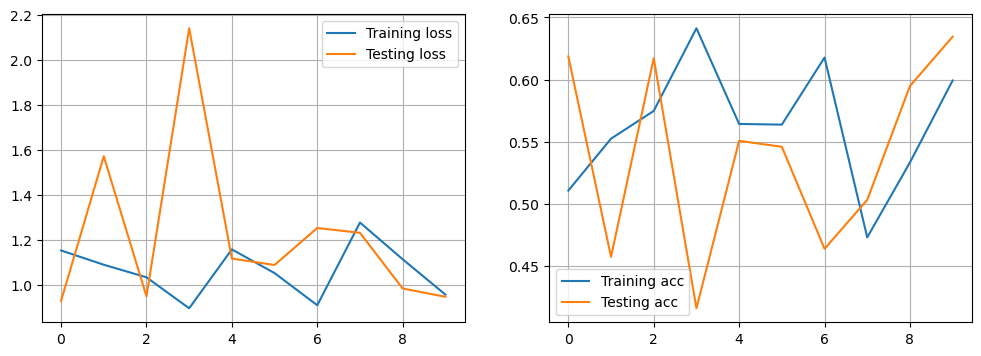

In [23]:
simple_RNN_model = Sequential()
simple_RNN_model.add(layers.SimpleRNN(input_shape=(128, 9), units=256))
simple_RNN_model.add(layers.Dense(N_CLASSES, activation="softmax"))

optimizer = optimizers.Adam(clipnorm=0.2)
simple_RNN_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

simple_RNN_model.summary()

batch_size = 64
n_epochs   = 10

log = simple_RNN_model.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)

#### Findings
We wanted to see if clipping improves the model but we think the architecture is too simple for this task, therefore also clipping won't help. Interestingly tough that the learning got even more unstable.

### LSTM

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                12000     
                                                                 
 dense_10 (Dense)            (None, 6)                 306       
                                                                 
Total params: 12,306
Trainable params: 12,306
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2024-05-07 21:58:10.851386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-07 21:58:10.853217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-07 21:58:10.854606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

115/115 [==============================] - ETA: 0s - loss: 1.2999 - accuracy: 0.4612

2024-05-07 21:58:28.930989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-07 21:58:28.932535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-07 21:58:28.934175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

115/115 [==============================] - 20s 151ms/step - loss: 1.2999 - accuracy: 0.4612 - val_loss: 1.0794 - val_accuracy: 0.5629
Epoch 2/10
115/115 [==============================] - 21s 183ms/step - loss: 0.9053 - accuracy: 0.6143 - val_loss: 0.8822 - val_accuracy: 0.6403
Epoch 3/10
115/115 [==============================] - 21s 181ms/step - loss: 0.6558 - accuracy: 0.7440 - val_loss: 0.7233 - val_accuracy: 0.7384
Epoch 4/10
115/115 [==============================] - 24s 205ms/step - loss: 0.5614 - accuracy: 0.7960 - val_loss: 0.9456 - val_accuracy: 0.7258
Epoch 5/10
115/115 [==============================] - 26s 227ms/step - loss: 0.4429 - accuracy: 0.8473 - val_loss: 0.8045 - val_accuracy: 0.7418
Epoch 6/10
115/115 [==============================] - 22s 195ms/step - loss: 0.3350 - accuracy: 0.8862 - val_loss: 0.6051 - val_accuracy: 0.8276
Epoch 7/10
115/115 [==============================] - 22s 196ms/step - loss: 0.2735 - accuracy: 0.9089 - val_loss: 0.6042 - val_accuracy: 0.8

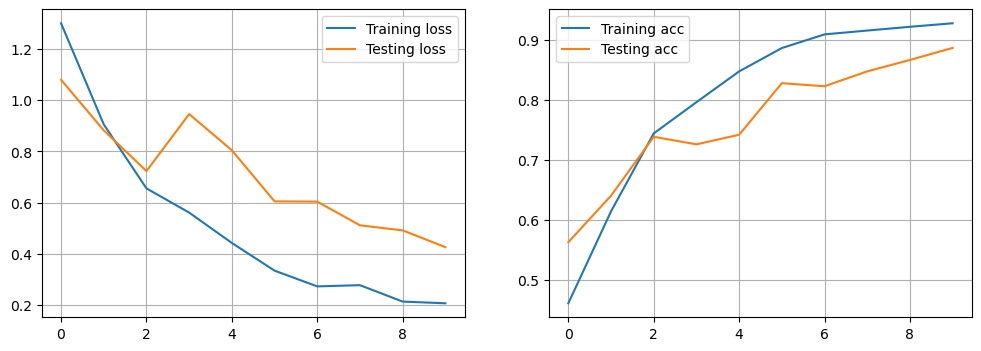

In [28]:
### START YOUR CODE
simple_LSTM_model = Sequential()
simple_LSTM_model.add(layers.LSTM(50, input_shape=(128, 9), return_sequences=False))
simple_LSTM_model.add(layers.Dense(N_CLASSES, activation='softmax'))

optimizer = optimizers.Adam(clipnorm=0.2)
simple_LSTM_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

simple_LSTM_model.summary()

batch_size = 64
n_epochs   = 10

log = simple_LSTM_model.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)
### END YOUR CODE

#### Findings

One-layered LSTM model with gradient clipping to stabilize learning, demonstrated improved accuracy compared to the simple RNN. This enhancement in performance underscores the LSTM's ability to better capture and utilize the temporal dynamics of the accelerometer and gyroscope data.

### Stacked LSTMs

2024-05-07 22:01:50.189791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-07 22:01:50.191926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-07 22:01:50.193245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128, 50)           12000     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 6)                 306       
                                                                 
Total params: 32,506
Trainable params: 32,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2024-05-07 22:01:50.439116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-07 22:01:50.441270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-07 22:01:50.443003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

115/115 [==============================] - ETA: 0s - loss: 1.0631 - accuracy: 0.5613

2024-05-07 22:02:27.095650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-07 22:02:27.097508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-07 22:02:27.099044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

115/115 [==============================] - 41s 328ms/step - loss: 1.0631 - accuracy: 0.5613 - val_loss: 0.9457 - val_accuracy: 0.6084
Epoch 2/10
115/115 [==============================] - 36s 314ms/step - loss: 0.6498 - accuracy: 0.7284 - val_loss: 0.6796 - val_accuracy: 0.7384
Epoch 3/10
115/115 [==============================] - 38s 328ms/step - loss: 0.4955 - accuracy: 0.7943 - val_loss: 0.6170 - val_accuracy: 0.7594
Epoch 4/10
115/115 [==============================] - 37s 322ms/step - loss: 0.3738 - accuracy: 0.8562 - val_loss: 0.5158 - val_accuracy: 0.8290
Epoch 5/10
115/115 [==============================] - 38s 334ms/step - loss: 0.2484 - accuracy: 0.9125 - val_loss: 0.5036 - val_accuracy: 0.8504
Epoch 6/10
115/115 [==============================] - 37s 324ms/step - loss: 0.1817 - accuracy: 0.9308 - val_loss: 0.5968 - val_accuracy: 0.8432
Epoch 7/10
115/115 [==============================] - 35s 308ms/step - loss: 0.1692 - accuracy: 0.9302 - val_loss: 0.4647 - val_accuracy: 0.8

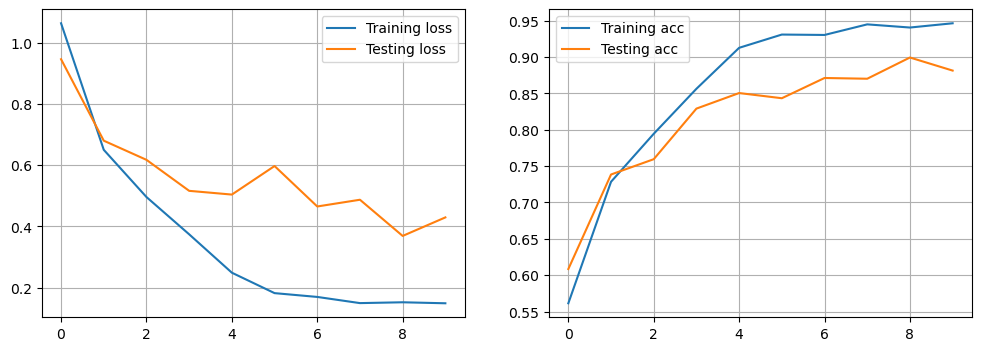

In [29]:
### START YOUR CODE
LSTM_model = Sequential()
LSTM_model.add(layers.LSTM(50, input_shape=(128, 9), return_sequences=True))
LSTM_model.add(layers.LSTM(50, return_sequences=False))
LSTM_model.add(layers.Dense(N_CLASSES, activation='softmax'))

optimizer = optimizers.Adam(clipnorm=0.2)
LSTM_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

LSTM_model.summary()

batch_size = 64
n_epochs   = 10

log = LSTM_model.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)
### END YOUR CODE

#### Findings

Two-layered LSTM model, which achieved even better accuracy, albeit by a slight margin. This improvement highlights the model's enhanced capability to extract more complex features and patterns from the sequential data.

### CNN (Conv1d)

Epoch 1/10
115/115 [==============================] - 8s 61ms/step - loss: 0.4595 - accuracy: 0.8118 - val_loss: 0.4308 - val_accuracy: 0.8537
Epoch 2/10
115/115 [==============================] - 6s 54ms/step - loss: 0.1519 - accuracy: 0.9410 - val_loss: 0.4048 - val_accuracy: 0.8677
Epoch 3/10
115/115 [==============================] - 6s 52ms/step - loss: 0.1232 - accuracy: 0.9474 - val_loss: 0.3616 - val_accuracy: 0.8992
Epoch 4/10
115/115 [==============================] - 7s 59ms/step - loss: 0.1122 - accuracy: 0.9509 - val_loss: 0.3812 - val_accuracy: 0.8931
Epoch 5/10
115/115 [==============================] - 6s 53ms/step - loss: 0.1075 - accuracy: 0.9506 - val_loss: 0.4003 - val_accuracy: 0.9046
Epoch 6/10
115/115 [==============================] - 6s 56ms/step - loss: 0.1012 - accuracy: 0.9550 - val_loss: 0.3743 - val_accuracy: 0.9006
Epoch 7/10
115/115 [==============================] - 6s 55ms/step - loss: 0.1014 - accuracy: 0.9558 - val_loss: 0.3489 - val_accuracy: 0.9080

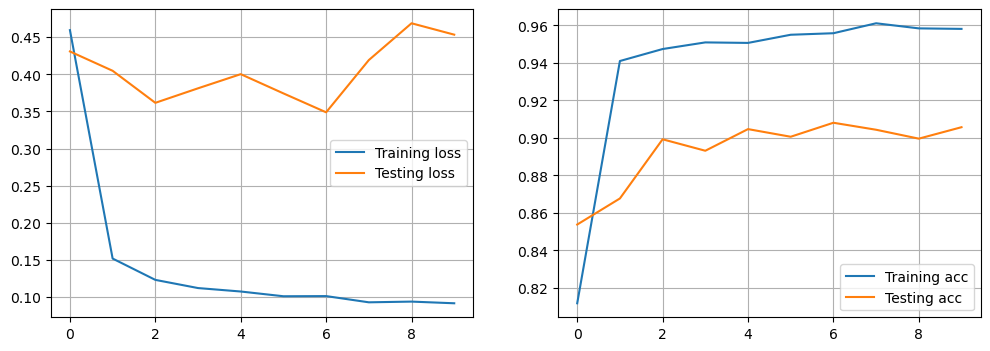

In [30]:
### START YOUR CODE
model_cnn = Sequential()
model_cnn.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 9)))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(100, activation='relu'))
model_cnn.add(layers.Dense(N_CLASSES, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 64
n_epochs   = 10

log = model_cnn.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)
### END YOUR CODE

#### Findings

Here we have a CNN model with a straightforward architecture, which rapidly showed learning improvements and delivered the best accuracy so far, surpassingly better than the LSTM models. This intriguing result suggests that the convolutional layers were particularly effective in capturing spatial and temporal features from the sensor data, even outperforming the traditionally favored LSTM for time series analysis in this scenario.

### MLP

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               295168    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 6)                 774       
                                                                 
Total params: 328,838
Trainable params: 328,838
Non-t

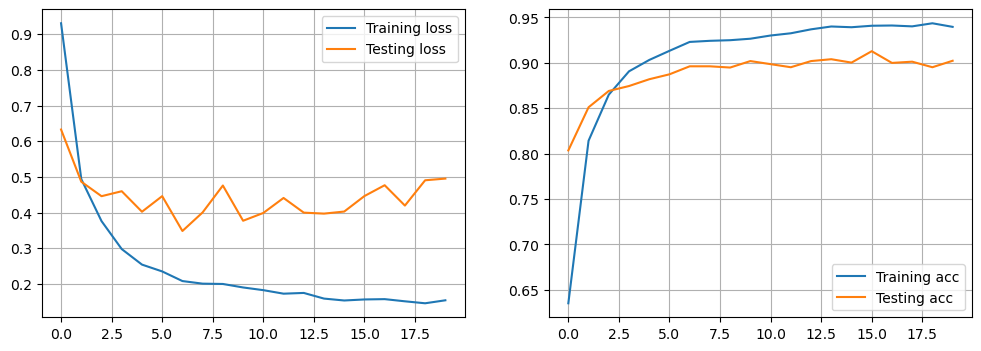

In [31]:
### START YOUR CODE
mlp_model = Sequential()
mlp_model.add(layers.Flatten(input_shape=(128, 9)))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dropout(0.5))    
mlp_model.add(layers.Dense(128, activation='relu')) 
mlp_model.add(layers.Dropout(0.5))     
mlp_model.add(layers.Dense(N_CLASSES, activation='softmax')) 

optimizer = optimizers.Adam()
mlp_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

mlp_model.summary()

batch_size = 64
n_epochs = 20
log = mlp_model.fit(X_train, Y_train_onehot, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, Y_test_onehot))
plot_performance(log)
### END YOUR CODE

#### Findings

MLP model that incorporated multiple dense layers, and it performed comparably well to the CNN and better than the LSTM models. This outcome is very intriguing, as it suggests that the MLP's ability to model the relationships in the data through its fully connected structure was highly effective, even without the temporal processing capabilities of the LSTM.

Possible Reasons for Performance Differences:
- Feature Representation: The MLP and CNN might be capturing different types of features that are more significant for this specific dataset, whereas the LSTM's advantage in capturing temporal dependencies might not be as critical here due to the nature or preprocessing of the data. 
- Data Characteristics: If the time dependencies within the data are not very strong or are less informative for the task, CNNs and MLPs might perform better by extracting spatial or simpler features across the time steps.

Improvements for LSTM Models:
- Increasing Model Complexity: Adding more layers or units might help the LSTM model to capture more complex patterns and dependencies.
- Tuning Hyperparameters: Adjusting learning rates, number of epochs, and batch sizes could optimize training.
- Advanced Techniques: Implementing techniques like bidirectional LSTMs or adding attention mechanisms could enhance the model's ability to focus on important time steps.